# Importy

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

___
# Zadanie 1

In [ ]:
def prosta_regresji_mnk(x, y):
    n = len(x)
    x_mean = sum(x) / n
    y_mean = sum(y) / n
    numerator = sum((x[i] - x_mean) * (y[i] - y_mean) for i in range(n))
    denominator = sum((x[i] - x_mean) ** 2 for i in range(n))
    b1 = numerator / denominator
    b0 = y_mean - b1 * x_mean
    return b0, b1

n = 1000
beta_0 = 5
beta_1 = 2
M = 5000
nu = 5

beta_0_estimates = np.zeros(M)
beta_1_estimates = np.zeros(M)

for _ in range(M):
    x_range = np.linspace(0, 10, n)
    epsilon = stats.t.rvs(df=nu, size=n)
    y = beta_0 + beta_1 * x_range + epsilon
    b0_hat, b1_hat = prosta_regresji_mnk(x_range, y)
    beta_0_estimates[_] = b0_hat
    beta_1_estimates[_] = b1_hat

empirical_mean_beta_0 = np.mean(beta_0_estimates)
empirical_mean_beta_1 = np.mean(beta_1_estimates)
empirical_var_beta_0 = np.var(beta_0_estimates)
empirical_var_beta_1 = np.var(beta_1_estimates)

x_mean = np.mean(x_range)
var_epsilon = nu / (nu - 2)  
theoretical_var_beta_0 = (1 / n + (x_mean ** 2) / np.sum((x_range - x_mean) ** 2)) * var_epsilon
theoretical_var_beta_1 = var_epsilon / np.sum((x_range - x_mean) ** 2)

print(f'Empiryczna wartość oczekiwana beta_0: {empirical_mean_beta_0}')
print(f'Teoretyczna wartość oczekiwana beta_0: {beta_0}')
print(f'Empiryczna wariancja beta_0: {empirical_var_beta_0}')
print(f'Teoretyczna wariancja beta_0: {theoretical_var_beta_0}')
print(f'\nEmpiryczna wartość oczekiwana beta_1: {empirical_mean_beta_1}')
print(f'Teoretyczna wartość oczekiwana beta_1: {beta_1}')
print(f'Empiryczna wariancja beta_1: {empirical_var_beta_1}')
print(f'Teoretyczna wariancja beta_1: {theoretical_var_beta_1}')


Empiryczna wartość oczekiwana beta_0: 5.000474248911928
Teoretyczna wartość oczekiwana beta_0: 5
Empiryczna wariancja beta_0: 0.0066613504348643346
Teoretyczna wariancja beta_0: 0.006656676656676654

Empiryczna wartość oczekiwana beta_1: 1.9997804261383645
Teoretyczna wartość oczekiwana beta_1: 2
Empiryczna wariancja beta_1: 0.00019899222775965908
Teoretyczna wariancja beta_1: 0.00019960039960039956


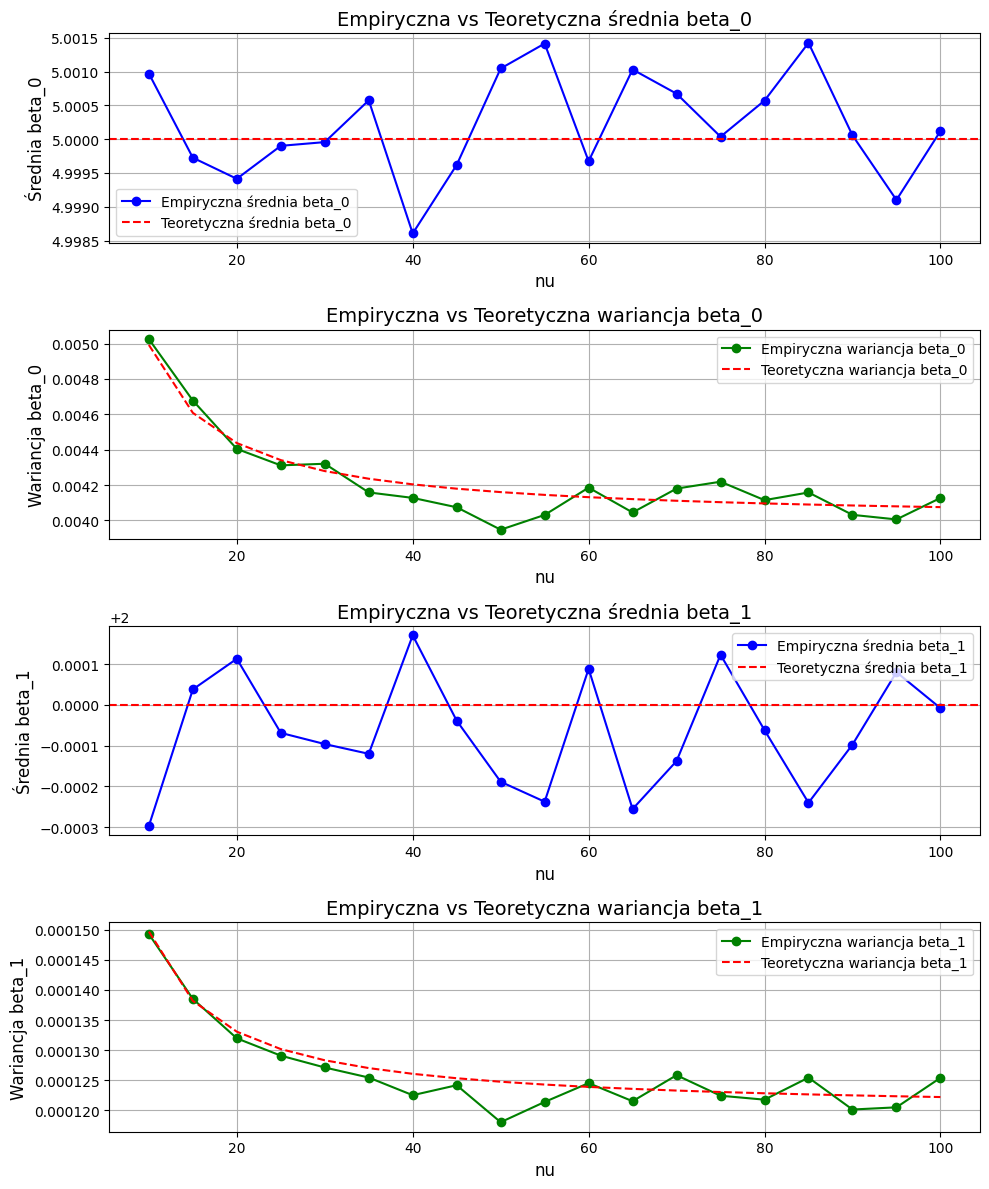

In [ ]:
n = 1000
beta_0 = 5
beta_1 = 2
M = 5000
nu_values = range(10, 101, 5)

empirical_means_beta_0 = []
empirical_means_beta_1 = []
empirical_vars_beta_0 = []
empirical_vars_beta_1 = []
theoretical_vars_beta_0 = []
theoretical_vars_beta_1 = []

for nu in nu_values:
    beta_0_estimates = np.zeros(M)
    beta_1_estimates = np.zeros(M)

    for i in range(M):
        x = np.linspace(0, 10, n)
        epsilon = stats.t.rvs(df=nu, size=n)
        y = beta_0 + beta_1 * x + epsilon
        b0_hat, b1_hat = prosta_regresji_mnk(x, y)
        beta_0_estimates[i] = b0_hat
        beta_1_estimates[i] = b1_hat

    empirical_mean_beta_0 = np.mean(beta_0_estimates)
    empirical_mean_beta_1 = np.mean(beta_1_estimates)
    empirical_var_beta_0 = np.var(beta_0_estimates)
    empirical_var_beta_1 = np.var(beta_1_estimates)

    x_mean = np.mean(x)
    var_epsilon = nu / (nu - 2)
    theoretical_var_beta_0 = (1 / n + (x_mean ** 2) / np.sum((x - x_mean) ** 2)) * var_epsilon
    theoretical_var_beta_1 = var_epsilon / np.sum((x - x_mean) ** 2)

    empirical_means_beta_0.append(empirical_mean_beta_0)
    empirical_means_beta_1.append(empirical_mean_beta_1)
    empirical_vars_beta_0.append(empirical_var_beta_0)
    empirical_vars_beta_1.append(empirical_var_beta_1)
    theoretical_vars_beta_0.append(theoretical_var_beta_0)
    theoretical_vars_beta_1.append(theoretical_var_beta_1)

plt.figure(figsize=(10, 12))

plt.subplot(4, 1, 1)
plt.plot(nu_values, empirical_means_beta_0, marker='o', linestyle='-', color='blue', label='Empiryczna średnia beta_0')
plt.axhline(y=beta_0, color='red', linestyle='--', label='Teoretyczna średnia beta_0')
plt.xlabel('nu', fontsize=12)
plt.ylabel('Średnia beta_0', fontsize=12)
plt.title('Empiryczna vs Teoretyczna średnia beta_0', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)

plt.subplot(4, 1, 2)
plt.plot(nu_values, empirical_vars_beta_0, marker='o', linestyle='-', color='green', label='Empiryczna wariancja beta_0')
plt.plot(nu_values, theoretical_vars_beta_0, linestyle='--', color='red', label='Teoretyczna wariancja beta_0')
plt.xlabel('nu', fontsize=12)
plt.ylabel('Wariancja beta_0', fontsize=12)
plt.title('Empiryczna vs Teoretyczna wariancja beta_0', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(nu_values, empirical_means_beta_1, marker='o', linestyle='-', color='blue', label='Empiryczna średnia beta_1')
plt.axhline(y=beta_1, color='red', linestyle='--', label='Teoretyczna średnia beta_1')
plt.xlabel('nu', fontsize=12)
plt.ylabel('Średnia beta_1', fontsize=12)
plt.title('Empiryczna vs Teoretyczna średnia beta_1', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(nu_values, empirical_vars_beta_1, marker='o', linestyle='-', color='green', label='Empiryczna wariancja beta_1')
plt.plot(nu_values, theoretical_vars_beta_1, linestyle='--', color='red', label='Teoretyczna wariancja beta_1')
plt.xlabel('nu', fontsize=12)
plt.ylabel('Wariancja beta_1', fontsize=12)
plt.title('Empiryczna vs Teoretyczna wariancja beta_1', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)

plt.tight_layout()
plt.show()

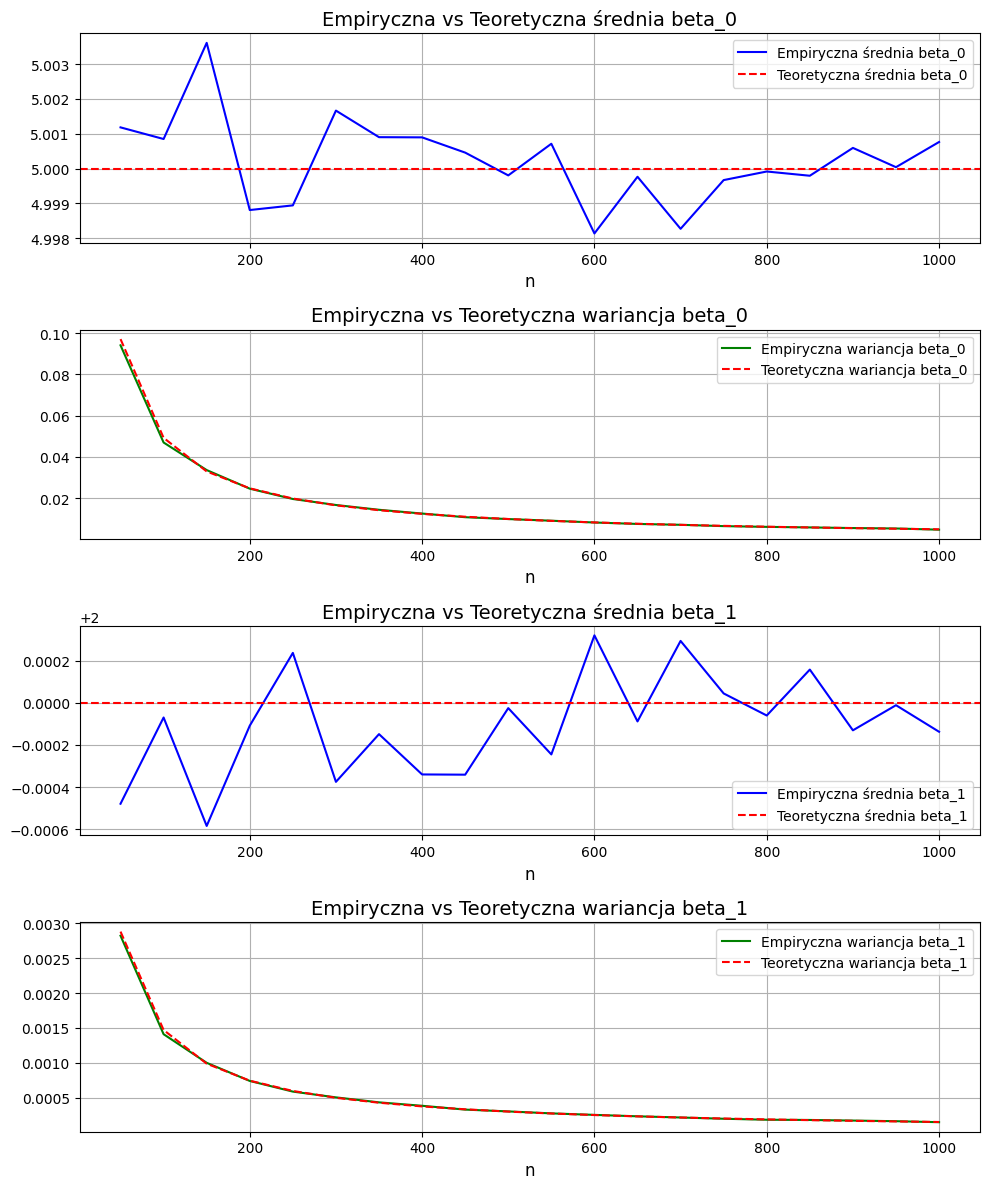

In [12]:
beta_0 = 5
beta_1 = 2
M = 5000
nu = 10
n_values = range(50, 1001, 50)

empirical_means_beta_0 = np.zeros(len(n_values))
empirical_means_beta_1 = np.zeros(len(n_values))
empirical_vars_beta_0 = np.zeros(len(n_values))
empirical_vars_beta_1 = np.zeros(len(n_values))
theoretical_vars_beta_0 = np.zeros(len(n_values))
theoretical_vars_beta_1 = np.zeros(len(n_values))

for j, n in enumerate(n_values):
    beta_0_estimates = np.zeros(M)
    beta_1_estimates = np.zeros(M)

    for i in range(M):
        x = np.linspace(0, 10, n)

        epsilon = stats.t.rvs(df=nu, size=n)

        y = beta_0 + beta_1 * x + epsilon

        b0_hat, b1_hat = prosta_regresji_mnk(x, y)

        beta_0_estimates[i] = b0_hat

        beta_1_estimates[i] = b1_hat

    empirical_means_beta_0[j] = np.mean(beta_0_estimates)
    empirical_means_beta_1[j] = np.mean(beta_1_estimates)
    empirical_vars_beta_0[j] = np.var(beta_0_estimates)
    empirical_vars_beta_1[j] = np.var(beta_1_estimates)

    x_mean = np.mean(x)
    var_epsilon = nu / (nu - 2)
    theoretical_vars_beta_0[j] = (1 / n + (x_mean ** 2) / np.sum((x - x_mean) ** 2)) * var_epsilon
    theoretical_vars_beta_1[j] = var_epsilon / np.sum((x - x_mean) ** 2)

plt.figure(figsize=(10, 12))

plt.subplot(4, 1, 1)
plt.plot(n_values, empirical_means_beta_0, linestyle='-', color='blue', label='Empiryczna średnia beta_0')
plt.axhline(y=beta_0, color='red', linestyle='--', label='Teoretyczna średnia beta_0')
plt.xlabel('n', fontsize=12)
plt.title('Empiryczna vs Teoretyczna średnia beta_0', fontsize=14)
plt.legend()
plt.grid(True)

plt.subplot(4, 1, 2)
plt.plot(n_values, empirical_vars_beta_0, linestyle='-', color='green', label='Empiryczna wariancja beta_0')
plt.plot(n_values, theoretical_vars_beta_0, linestyle='--', color='red', label='Teoretyczna wariancja beta_0')
plt.xlabel('n', fontsize=12)
plt.title('Empiryczna vs Teoretyczna wariancja beta_0', fontsize=14)
plt.legend()
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(n_values, empirical_means_beta_1, linestyle='-', color='blue', label='Empiryczna średnia beta_1')
plt.axhline(y=beta_1, color='red', linestyle='--', label='Teoretyczna średnia beta_1')
plt.xlabel('n', fontsize=12)
plt.title('Empiryczna vs Teoretyczna średnia beta_1', fontsize=14)
plt.legend()
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(n_values, empirical_vars_beta_1, linestyle='-', color='green', label='Empiryczna wariancja beta_1')
plt.plot(n_values, theoretical_vars_beta_1, linestyle='--', color='red', label='Teoretyczna wariancja beta_1')
plt.xlabel('n', fontsize=12)
plt.title('Empiryczna vs Teoretyczna wariancja beta_1', fontsize=14)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

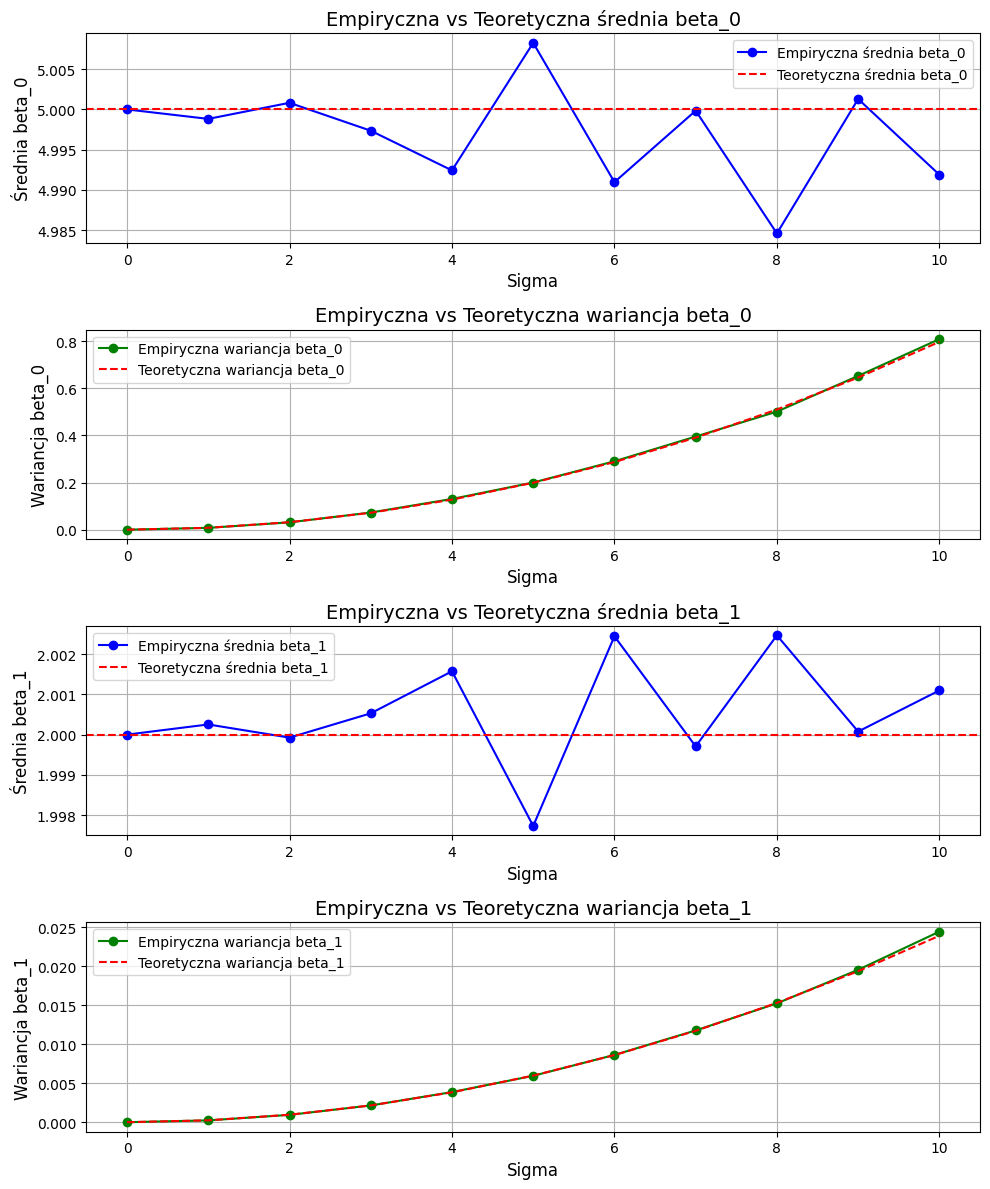

In [13]:
beta_0 = 5
beta_1 = 2
M = 5000
sigma_values = np.linspace(0, 10, 11)
n = 500

empirical_means_beta_0 = np.zeros(len(sigma_values))
empirical_means_beta_1 = np.zeros(len(sigma_values))
empirical_vars_beta_0 = np.zeros(len(sigma_values))
empirical_vars_beta_1 = np.zeros(len(sigma_values))
theoretical_vars_beta_0 = np.zeros(len(sigma_values))
theoretical_vars_beta_1 = np.zeros(len(sigma_values))

for s_idx, sigma in enumerate(sigma_values):
    beta_0_estimates = np.zeros(M)
    beta_1_estimates = np.zeros(M)

    for i in range(M):
        x = np.linspace(0, 10, n)

        epsilon = np.random.normal(0, sigma, n)

        y = beta_0 + beta_1 * x + epsilon

        b0_hat, b1_hat = prosta_regresji_mnk(x, y)

        beta_0_estimates[i] = b0_hat
        beta_1_estimates[i] = b1_hat

    empirical_means_beta_0[s_idx] = np.mean(beta_0_estimates)
    empirical_means_beta_1[s_idx] = np.mean(beta_1_estimates)
    empirical_vars_beta_0[s_idx] = np.var(beta_0_estimates)
    empirical_vars_beta_1[s_idx] = np.var(beta_1_estimates)

    x_mean = np.mean(x)
    var_epsilon = sigma ** 2
    theoretical_vars_beta_0[s_idx] = (1 / n + (x_mean ** 2) / np.sum((x - x_mean) ** 2)) * var_epsilon
    theoretical_vars_beta_1[s_idx] = var_epsilon / np.sum((x - x_mean) ** 2)

plt.figure(figsize=(10, 12))

plt.subplot(4, 1, 1)
plt.plot(sigma_values, empirical_means_beta_0, marker='o', linestyle='-', color='blue', label='Empiryczna średnia beta_0')
plt.axhline(y=beta_0, color='red', linestyle='--', label='Teoretyczna średnia beta_0')
plt.xlabel('Sigma', fontsize=12)
plt.ylabel('Średnia beta_0', fontsize=12)
plt.title('Empiryczna vs Teoretyczna średnia beta_0', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)

plt.subplot(4, 1, 2)
plt.plot(sigma_values, empirical_vars_beta_0, marker='o', linestyle='-', color='green', label='Empiryczna wariancja beta_0')
plt.plot(sigma_values, theoretical_vars_beta_0, linestyle='--', color='red', label='Teoretyczna wariancja beta_0')
plt.xlabel('Sigma', fontsize=12)
plt.ylabel('Wariancja beta_0', fontsize=12)
plt.title('Empiryczna vs Teoretyczna wariancja beta_0', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(sigma_values, empirical_means_beta_1, marker='o', linestyle='-', color='blue', label='Empiryczna średnia beta_1')
plt.axhline(y=beta_1, color='red', linestyle='--', label='Teoretyczna średnia beta_1')
plt.xlabel('Sigma', fontsize=12)
plt.ylabel('Średnia beta_1', fontsize=12)
plt.title('Empiryczna vs Teoretyczna średnia beta_1', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(sigma_values, empirical_vars_beta_1, marker='o', linestyle='-', color='green', label='Empiryczna wariancja beta_1')
plt.plot(sigma_values, theoretical_vars_beta_1, linestyle='--', color='red', label='Teoretyczna wariancja beta_1')
plt.xlabel('Sigma', fontsize=12)
plt.ylabel('Wariancja beta_1', fontsize=12)
plt.title('Empiryczna vs Teoretyczna wariancja beta_1', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)

plt.tight_layout()
plt.show()

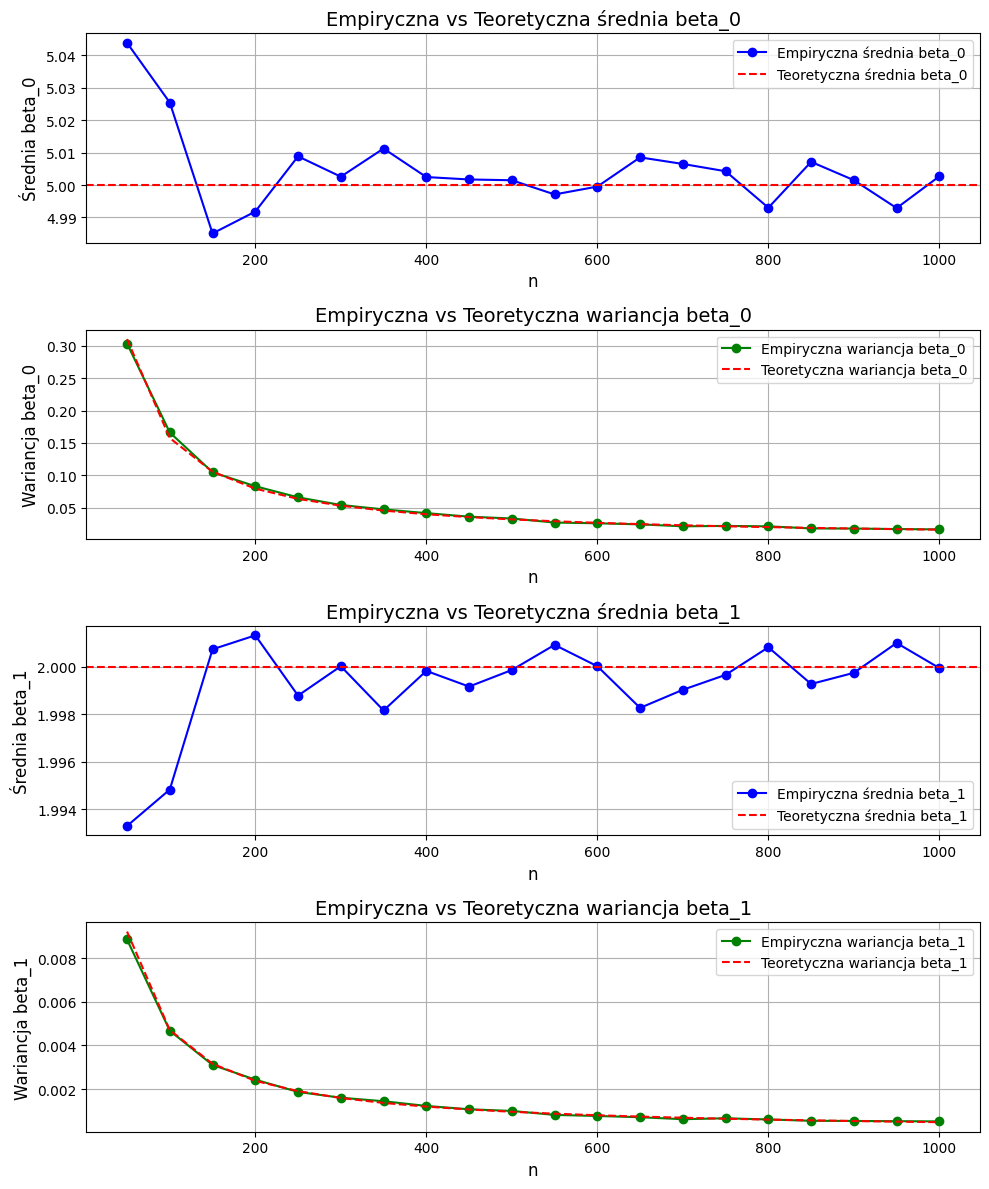

In [14]:
beta_0 = 5
beta_1 = 2
sigma = 2
M = 1000
n_values = range(50, 1001, 50)

empirical_means_beta_0 = np.zeros(len(n_values))
empirical_means_beta_1 = np.zeros(len(n_values))
empirical_vars_beta_0 = np.zeros(len(n_values))
empirical_vars_beta_1 = np.zeros(len(n_values))
theoretical_vars_beta_0 = np.zeros(len(n_values))
theoretical_vars_beta_1 = np.zeros(len(n_values))

for n_idx, n in enumerate(n_values):
    beta_0_estimates = np.zeros(M)
    beta_1_estimates = np.zeros(M)

    for i in range(M):
        x = np.linspace(0, 10, n)

        epsilon = np.random.normal(0, sigma, n)

        y = beta_0 + beta_1 * x + epsilon

        b0_hat, b1_hat = prosta_regresji_mnk(x, y)

        beta_0_estimates[i] = b0_hat
        beta_1_estimates[i] = b1_hat

    empirical_means_beta_0[n_idx] = np.mean(beta_0_estimates)
    empirical_means_beta_1[n_idx] = np.mean(beta_1_estimates)
    empirical_vars_beta_0[n_idx] = np.var(beta_0_estimates)
    empirical_vars_beta_1[n_idx] = np.var(beta_1_estimates)

    x_mean = np.mean(x)
    var_epsilon = sigma ** 2  
    theoretical_vars_beta_0[n_idx] = (1 / n + (x_mean ** 2) / np.sum((x - x_mean) ** 2)) * var_epsilon
    theoretical_vars_beta_1[n_idx] = var_epsilon / np.sum((x - x_mean) ** 2)

plt.figure(figsize=(10, 12))

plt.subplot(4, 1, 1)
plt.plot(n_values, empirical_means_beta_0, marker='o', linestyle='-', color='blue', label='Empiryczna średnia beta_0')
plt.axhline(y=beta_0, color='red', linestyle='--', label='Teoretyczna średnia beta_0')
plt.xlabel('n', fontsize=12)
plt.ylabel('Średnia beta_0', fontsize=12)
plt.title('Empiryczna vs Teoretyczna średnia beta_0', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)

plt.subplot(4, 1, 2)
plt.plot(n_values, empirical_vars_beta_0, marker='o', linestyle='-', color='green', label='Empiryczna wariancja beta_0')
plt.plot(n_values, theoretical_vars_beta_0, linestyle='--', color='red', label='Teoretyczna wariancja beta_0')
plt.xlabel('n', fontsize=12)
plt.ylabel('Wariancja beta_0', fontsize=12)
plt.title('Empiryczna vs Teoretyczna wariancja beta_0', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(n_values, empirical_means_beta_1, marker='o', linestyle='-', color='blue', label='Empiryczna średnia beta_1')
plt.axhline(y=beta_1, color='red', linestyle='--', label='Teoretyczna średnia beta_1')
plt.xlabel('n', fontsize=12)
plt.ylabel('Średnia beta_1', fontsize=12)
plt.title('Empiryczna vs Teoretyczna średnia beta_1', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(n_values, empirical_vars_beta_1, marker='o', linestyle='-', color='green', label='Empiryczna wariancja beta_1')
plt.plot(n_values, theoretical_vars_beta_1, linestyle='--', color='red', label='Teoretyczna wariancja beta_1')
plt.xlabel('n', fontsize=12)
plt.ylabel('Wariancja beta_1', fontsize=12)
plt.title('Empiryczna vs Teoretyczna wariancja beta_1', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)

plt.tight_layout()
plt.show()

___
# Zadanie 2

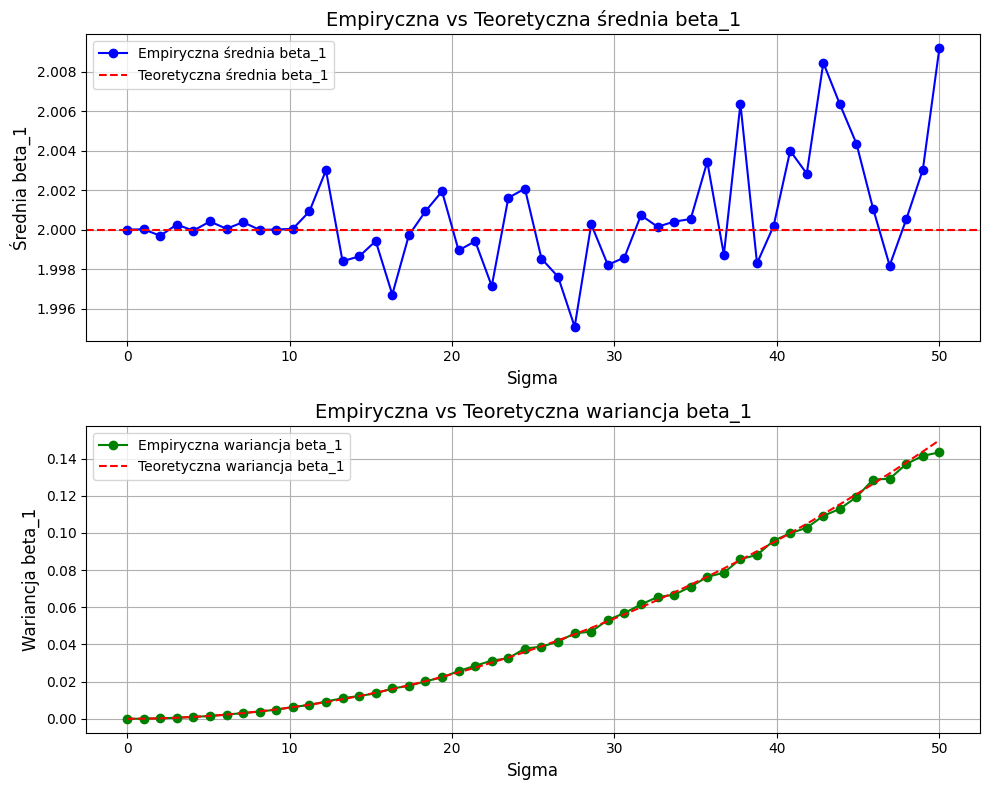

In [ ]:
beta_1 = 2
M = 5000
sigma_values = np.linspace(0, 50, 50)
n = 500

def prosta_regresji_mnk(x, y):
    n = len(x)
    numerator = sum((x[i] * y[i]) for i in range(n))
    denominator = sum((x[i] ** 2) for i in range(n))
    b1 = numerator / denominator
    return b1

empirical_means_beta_1 = np.zeros(len(sigma_values))
empirical_vars_beta_1 = np.zeros(len(sigma_values))
theoretical_vars_beta_1 = np.zeros(len(sigma_values))

for k, sigma in enumerate(sigma_values):
    beta_1_estimates = np.zeros(M)

    for i in range(M):
        x = np.linspace(0, 10, n)

        epsilon = np.random.normal(0, sigma, n)

        y = beta_1 * x + epsilon

        b1_hat = prosta_regresji_mnk(x, y)

        beta_1_estimates[i] = b1_hat

    empirical_means_beta_1[k] = np.mean(beta_1_estimates)
    empirical_vars_beta_1[k] = np.var(beta_1_estimates)

    x_mean = np.mean(x)
    var_epsilon = sigma ** 2
    theoretical_vars_beta_1[k] = var_epsilon / np.sum(x ** 2)

plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
plt.plot(sigma_values, empirical_means_beta_1, marker='o', linestyle='-', color='blue', label='Empiryczna średnia beta_1')
plt.axhline(y=beta_1, color='red', linestyle='--', label='Teoretyczna średnia beta_1')
plt.xlabel('Sigma', fontsize=12)
plt.ylabel('Średnia beta_1', fontsize=12)
plt.title('Empiryczna vs Teoretyczna średnia beta_1', fontsize=14)
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(sigma_values, empirical_vars_beta_1, marker='o', linestyle='-', color='green', label='Empiryczna wariancja beta_1')
plt.plot(sigma_values, theoretical_vars_beta_1, linestyle='--', color='red', label='Teoretyczna wariancja beta_1')
plt.xlabel('Sigma', fontsize=12)
plt.ylabel('Wariancja beta_1', fontsize=12)
plt.title('Empiryczna vs Teoretyczna wariancja beta_1', fontsize=14)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

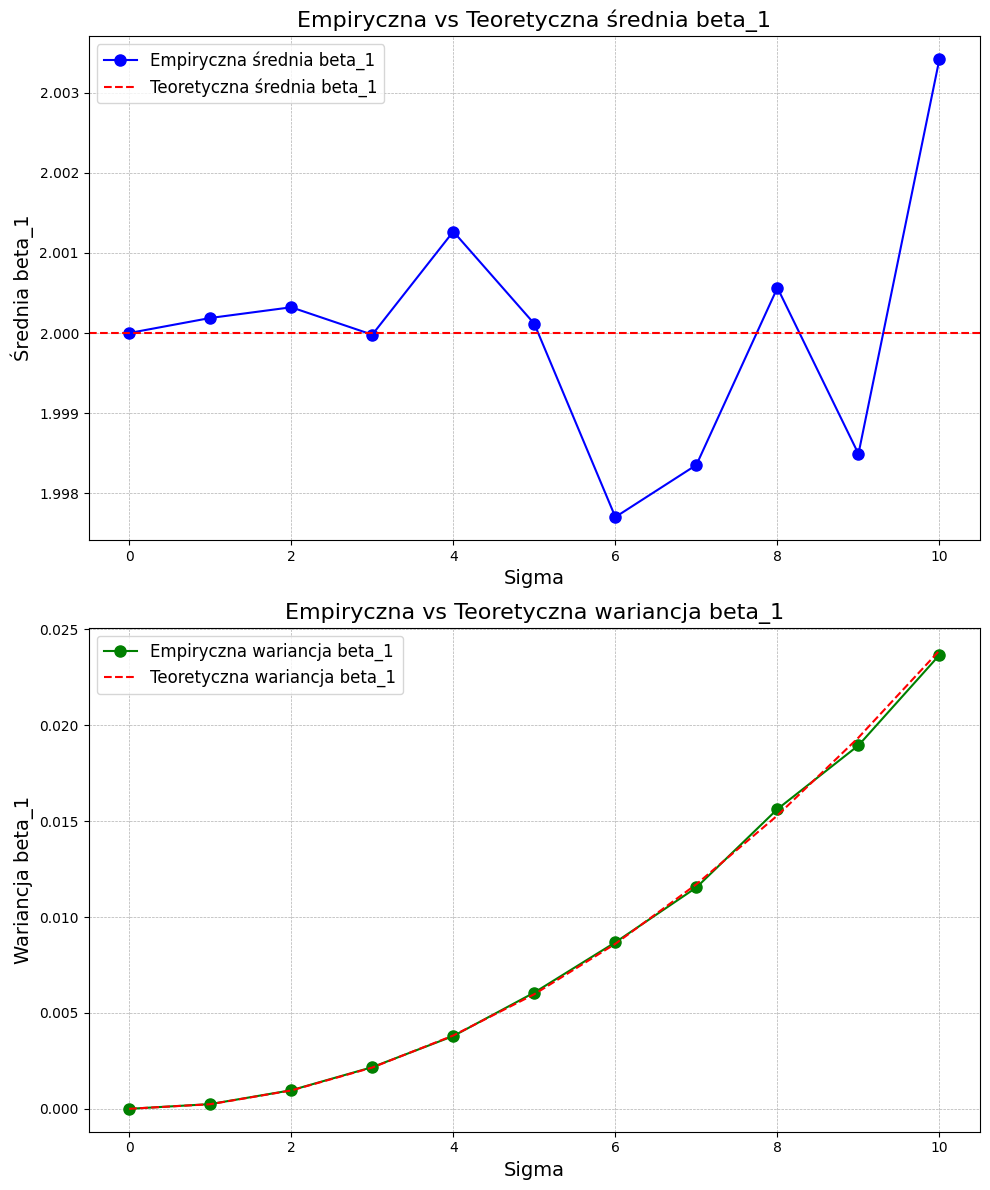

In [18]:
beta_1 = 2
M = 5000
sigma_values = np.linspace(0, 10, 11)
n = 500

empirical_means_beta_1 = np.zeros(len(sigma_values))
empirical_vars_beta_1 = np.zeros(len(sigma_values))
theoretical_vars_beta_1 = np.zeros(len(sigma_values))

def prosta_regresji_mnk(x, y):
    n = len(x)
    x_mean = sum(x) / n
    y_mean = sum(y) / n
    numerator = sum((x[i] - x_mean) * (y[i] - y_mean) for i in range(n))
    denominator = sum((x[i] - x_mean) ** 2 for i in range(n))
    b1 = numerator / denominator
    return b1

for s, sigma in enumerate(sigma_values):
    beta_1_estimates = np.zeros(M)

    for i in range(M):
        x = np.linspace(0, 10, n)
        epsilon = np.random.normal(0, sigma, n)
        y = beta_1 * x + epsilon

        b1_hat = prosta_regresji_mnk(x, y)
        beta_1_estimates[i] = b1_hat

    empirical_means_beta_1[s] = np.mean(beta_1_estimates)
    empirical_vars_beta_1[s] = np.var(beta_1_estimates)

    x_mean = np.mean(x)
    var_epsilon = sigma ** 2
    theoretical_vars_beta_1[s] = var_epsilon / np.sum((x - x_mean) ** 2)

plt.figure(figsize=(10, 12))

plt.subplot(2, 1, 1)
plt.plot(sigma_values, empirical_means_beta_1, marker='o', linestyle='-', color='blue', markersize=8, label='Empiryczna średnia beta_1')
plt.axhline(y=beta_1, color='red', linestyle='--', label='Teoretyczna średnia beta_1')
plt.xlabel('Sigma', fontsize=14)
plt.ylabel('Średnia beta_1', fontsize=14)
plt.title('Empiryczna vs Teoretyczna średnia beta_1', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.subplot(2, 1, 2)
plt.plot(sigma_values, empirical_vars_beta_1, marker='o', linestyle='-', color='green', markersize=8, label='Empiryczna wariancja beta_1')
plt.plot(sigma_values, theoretical_vars_beta_1, linestyle='--', color='red', label='Teoretyczna wariancja beta_1')
plt.xlabel('Sigma', fontsize=14)
plt.ylabel('Wariancja beta_1', fontsize=14)
plt.title('Empiryczna vs Teoretyczna wariancja beta_1', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

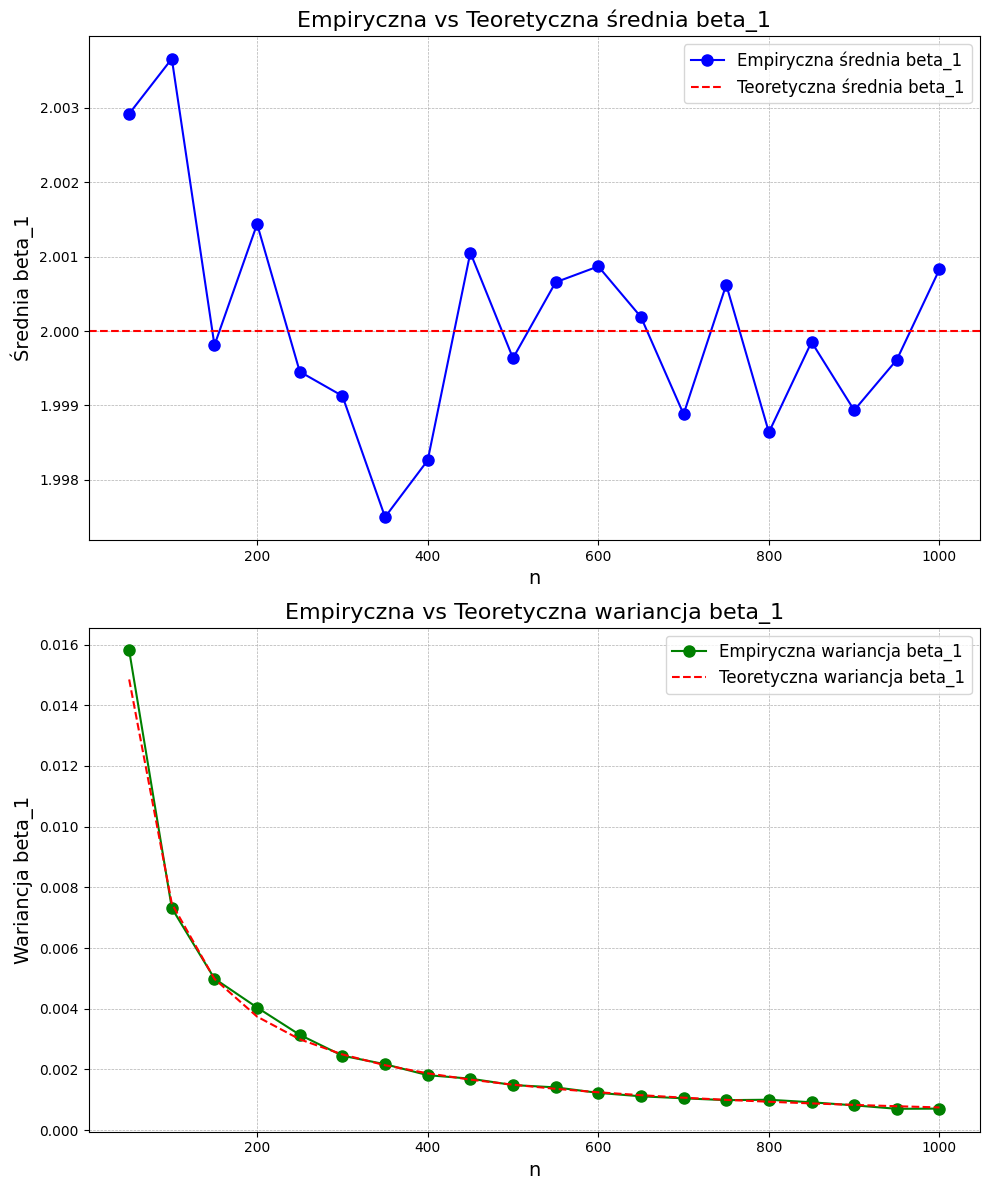

In [19]:
beta_1 = 2
M = 1000
sigma = 5
n_values = range(50, 1001, 50)

empirical_means_beta_1 = np.zeros(len(n_values))
empirical_vars_beta_1 = np.zeros(len(n_values))
theoretical_vars_beta_1 = np.zeros(len(n_values))

def prosta_regresji_mnk(x, y):
    n = len(x)
    numerator = sum((x[i] * y[i]) for i in range(n))
    denominator = sum((x[i] ** 2) for i in range(n))
    b1 = numerator / denominator
    return b1

for j, n in enumerate(n_values):
    beta_1_estimates = np.zeros(M)

    for i in range(M):
        x = np.linspace(0, 10, n)
        
        epsilon = np.random.normal(0, sigma, n)

        y = beta_1 * x + epsilon

        b1_hat = prosta_regresji_mnk(x, y)

        beta_1_estimates[i] = b1_hat

    empirical_means_beta_1[j] = np.mean(beta_1_estimates)
    empirical_vars_beta_1[j] = np.var(beta_1_estimates)

    var_epsilon = sigma ** 2  
    theoretical_vars_beta_1[j] = var_epsilon / np.sum(x ** 2)

plt.figure(figsize=(10, 12))

plt.subplot(2, 1, 1)
plt.plot(n_values, empirical_means_beta_1, marker='o', linestyle='-', color='blue', markersize=8, label='Empiryczna średnia beta_1')
plt.axhline(y=beta_1, color='red', linestyle='--', label='Teoretyczna średnia beta_1')
plt.xlabel('n', fontsize=14)
plt.ylabel('Średnia beta_1', fontsize=14)
plt.title('Empiryczna vs Teoretyczna średnia beta_1', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.subplot(2, 1, 2)
plt.plot(n_values, empirical_vars_beta_1, marker='o', linestyle='-', color='green', markersize=8, label='Empiryczna wariancja beta_1')
plt.plot(n_values, theoretical_vars_beta_1, linestyle='--', color='red', label='Teoretyczna wariancja beta_1')
plt.xlabel('n', fontsize=14)
plt.ylabel('Wariancja beta_1', fontsize=14)
plt.title('Empiryczna vs Teoretyczna wariancja beta_1', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

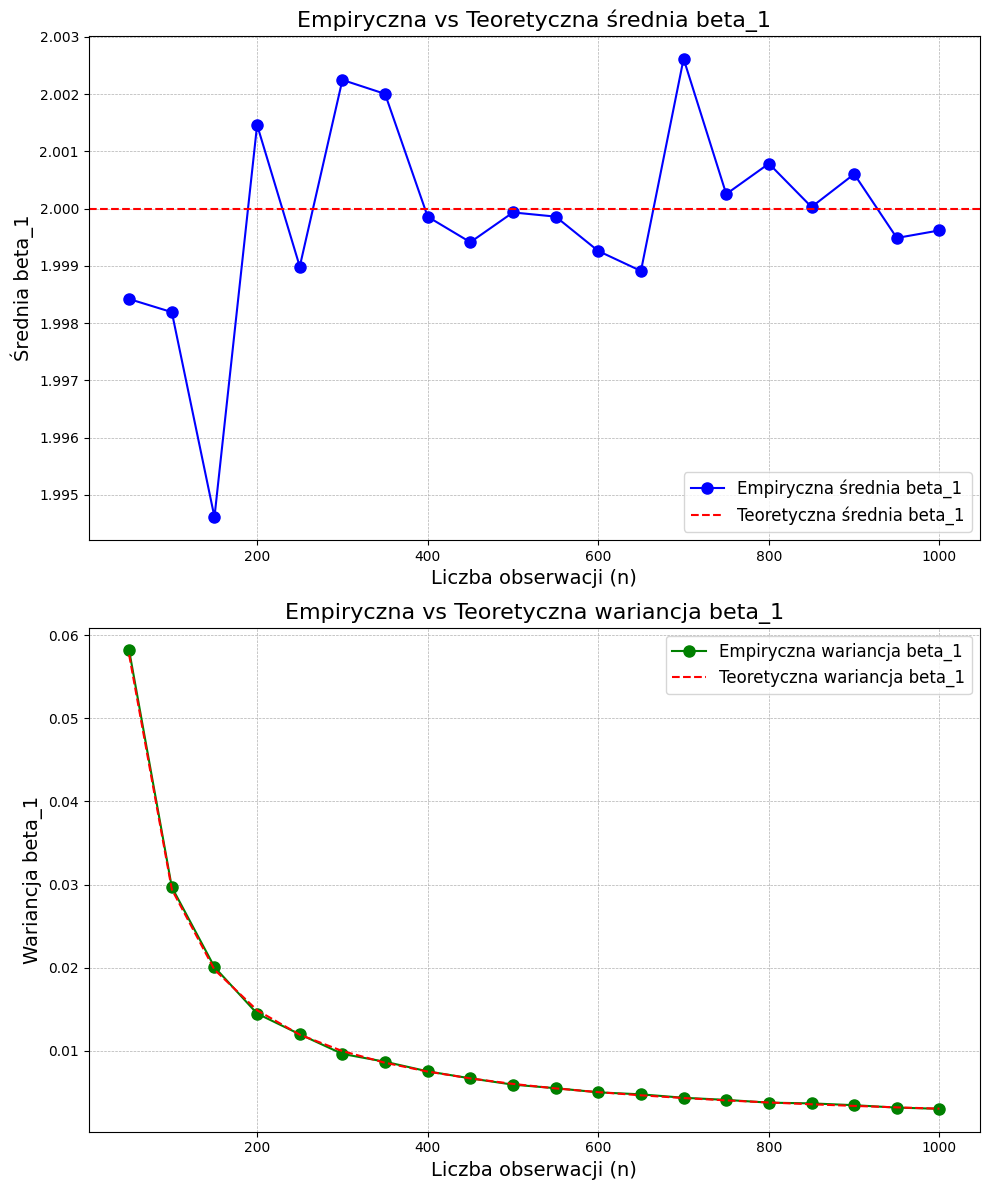

In [20]:
beta_1 = 2
M = 5000
sigma = 5  
n_values = range(50, 1001, 50)

empirical_means_beta_1 = np.zeros(len(n_values))
empirical_vars_beta_1 = np.zeros(len(n_values))
theoretical_vars_beta_1 = np.zeros(len(n_values))

def prosta_regresji_mnk(x, y):
    n = len(x)
    x_mean = sum(x) / n
    y_mean = sum(y) / n
    numerator = sum((x[i] - x_mean) * (y[i] - y_mean) for i in range(n))
    denominator = sum((x[i] - x_mean) ** 2 for i in range(n))
    b1 = numerator / denominator
    return b1

for n_idx, n in enumerate(n_values):
    beta_1_estimates = np.zeros(M)

    for i in range(M):
        x = np.linspace(0, 10, n)
        epsilon = np.random.normal(0, sigma, n)

        y = beta_1 * x + epsilon

        b1_hat = prosta_regresji_mnk(x, y)

        beta_1_estimates[i] = b1_hat

    empirical_means_beta_1[n_idx] = np.mean(beta_1_estimates)
    empirical_vars_beta_1[n_idx] = np.var(beta_1_estimates)

    x_mean = np.mean(x)
    var_epsilon = sigma ** 2  
    theoretical_vars_beta_1[n_idx] = var_epsilon / np.sum((x - x_mean) ** 2)

plt.figure(figsize=(10, 12))

plt.subplot(2, 1, 1)
plt.plot(n_values, empirical_means_beta_1, marker='o', linestyle='-', color='blue', markersize=8, label='Empiryczna średnia beta_1')
plt.axhline(y=beta_1, color='red', linestyle='--', label='Teoretyczna średnia beta_1')
plt.xlabel('Liczba obserwacji (n)', fontsize=14)
plt.ylabel('Średnia beta_1', fontsize=14)
plt.title('Empiryczna vs Teoretyczna średnia beta_1', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.subplot(2, 1, 2)
plt.plot(n_values, empirical_vars_beta_1, marker='o', linestyle='-', color='green', markersize=8, label='Empiryczna wariancja beta_1')
plt.plot(n_values, theoretical_vars_beta_1, linestyle='--', color='red', label='Teoretyczna wariancja beta_1')
plt.xlabel('Liczba obserwacji (n)', fontsize=14)
plt.ylabel('Wariancja beta_1', fontsize=14)
plt.title('Empiryczna vs Teoretyczna wariancja beta_1', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

___
# Zadanie 3

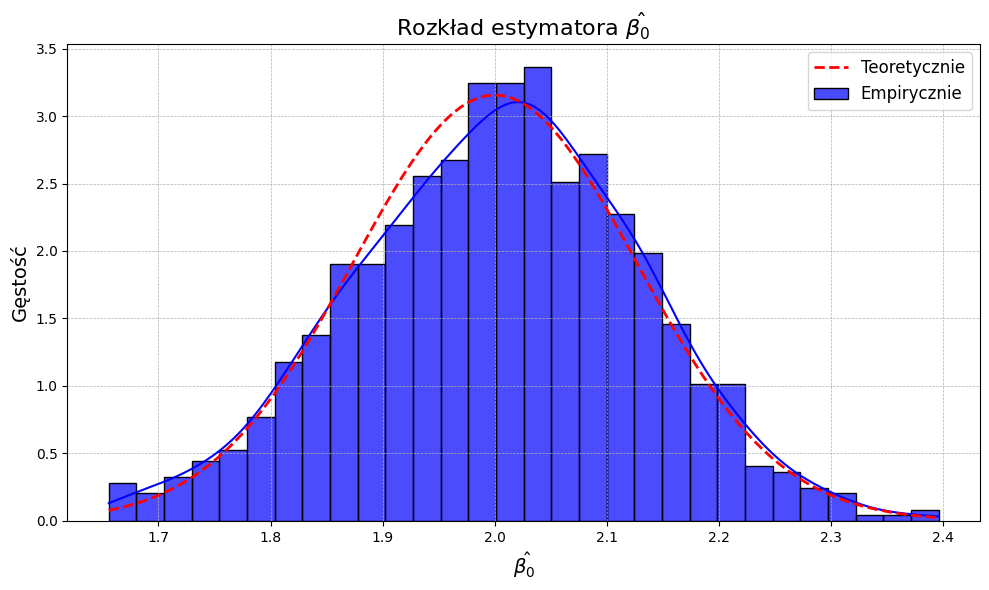

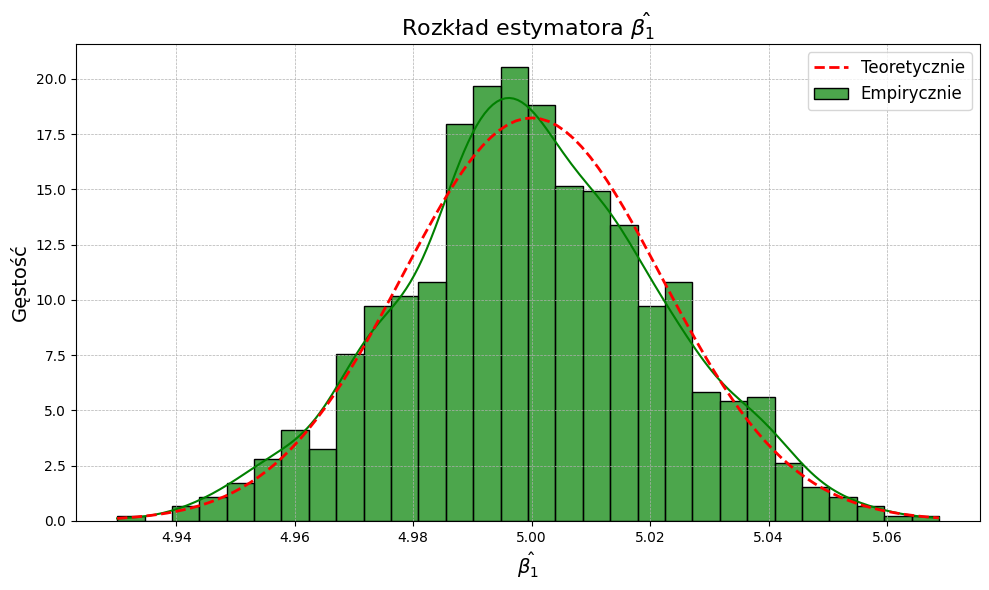

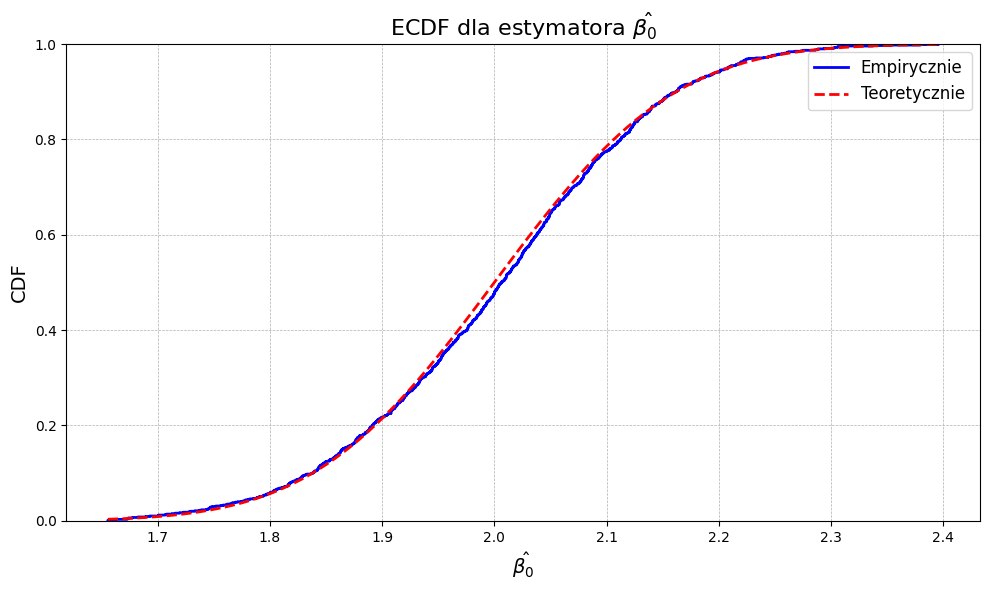

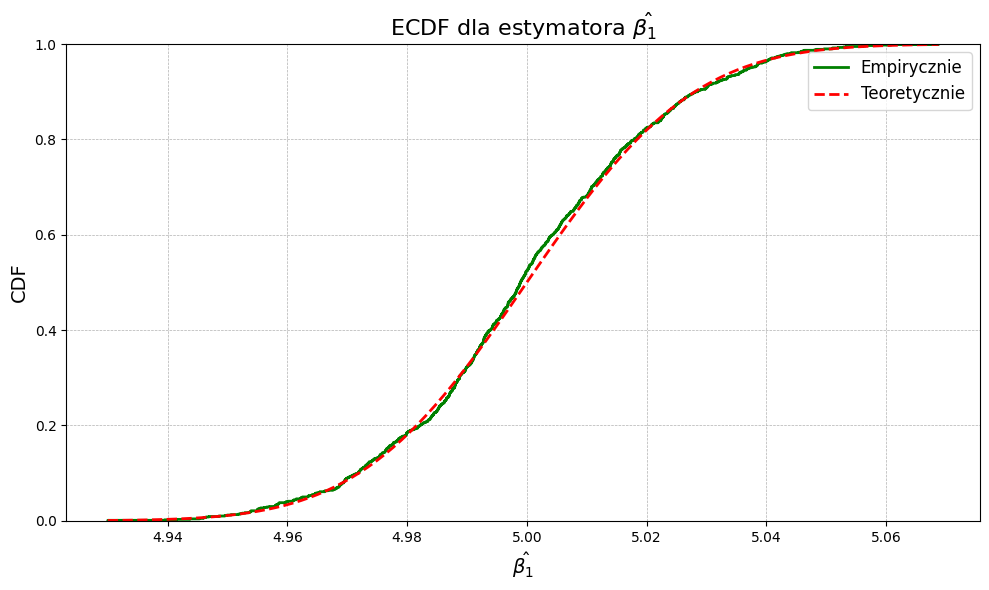

KS test for beta_0: Statistic=0.026400603051477733, p-value=0.4805169169807213
KS test for beta_1: Statistic=0.030257110938015863, p-value=0.3129083385550214


In [23]:
n = 1000
beta_0 = 2
beta_1 = 5
sigma = 2
M = 1000

beta_0_estimates = np.zeros(M)
beta_1_estimates = np.zeros(M)

def prosta_regresji_mnk(x, y):
    n = len(x)
    x_mean = sum(x) / n
    y_mean = sum(y) / n
    numerator = sum((x[i] - x_mean) * (y[i] - y_mean) for i in range(n))
    denominator = sum((x[i] - x_mean) ** 2 for i in range(n))
    b1 = numerator / denominator
    b0 = y_mean - b1 * x_mean
    return b0, b1

for i in range(M):
    x = np.linspace(0, 10, n)
    epsilon = np.random.normal(0, sigma, n)
    y = beta_0 + beta_1 * x + epsilon
    b0_hat, b1_hat = prosta_regresji_mnk(x, y)
    beta_0_estimates[i] = b0_hat
    beta_1_estimates[i] = b1_hat

x_mean = np.mean(x)
var_epsilon = sigma ** 2
theoretical_var_beta_0 = (var_epsilon * (1 / n + (x_mean ** 2) / np.sum((x - x_mean) ** 2)))
theoretical_var_beta_1 = var_epsilon / np.sum((x - x_mean) ** 2)

plt.figure(figsize=(10, 6))
sns.histplot(beta_0_estimates, bins=30, color='blue', alpha=0.7, stat='density', label='Empirycznie', kde=True)
mu_beta_0, std_beta_0 = beta_0, np.sqrt(theoretical_var_beta_0)
x_beta_0 = np.linspace(beta_0_estimates.min(), beta_0_estimates.max(), 100)
plt.plot(x_beta_0, stats.norm.pdf(x_beta_0, mu_beta_0, std_beta_0), 'r--', linewidth=2, label='Teoretycznie')
plt.title(r'Rozkład estymatora $\hat{\beta_0}$', fontsize=16)
plt.xlabel(r'$\hat{\beta_0}$', fontsize=14)
plt.ylabel('Gęstość', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(beta_1_estimates, bins=30, color='green', alpha=0.7, stat='density', label='Empirycznie', kde=True)
mu_beta_1, std_beta_1 = beta_1, np.sqrt(theoretical_var_beta_1)
x_beta_1 = np.linspace(beta_1_estimates.min(), beta_1_estimates.max(), 100)
plt.plot(x_beta_1, stats.norm.pdf(x_beta_1, mu_beta_1, std_beta_1), 'r--', linewidth=2, label='Teoretycznie')
plt.title(r'Rozkład estymatora $\hat{\beta_1}$', fontsize=16)
plt.xlabel(r'$\hat{\beta_1}$', fontsize=14)
plt.ylabel('Gęstość', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.ecdfplot(beta_0_estimates, label='Empirycznie', color='blue', linewidth=2)
plt.plot(x_beta_0, stats.norm.cdf(x_beta_0, mu_beta_0, std_beta_0), 'r--', linewidth=2, label='Teoretycznie')
plt.title(r'ECDF dla estymatora $\hat{\beta_0}$', fontsize=16)
plt.xlabel(r'$\hat{\beta_0}$', fontsize=14)
plt.ylabel('CDF', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.ecdfplot(beta_1_estimates, label='Empirycznie', color='green', linewidth=2)
plt.plot(x_beta_1, stats.norm.cdf(x_beta_1, mu_beta_1, std_beta_1), 'r--', linewidth=2, label='Teoretycznie')
plt.title(r'ECDF dla estymatora $\hat{\beta_1}$', fontsize=16)
plt.xlabel(r'$\hat{\beta_1}$', fontsize=14)
plt.ylabel('CDF', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

ks_beta_0 = stats.kstest(beta_0_estimates, 'norm', args=(mu_beta_0, std_beta_0))
ks_beta_1 = stats.kstest(beta_1_estimates, 'norm', args=(mu_beta_1, std_beta_1))
print(f"KS test for beta_0: Statistic={ks_beta_0.statistic}, p-value={ks_beta_0.pvalue}")
print(f"KS test for beta_1: Statistic={ks_beta_1.statistic}, p-value={ks_beta_1.pvalue}")

___
# Zadanie 4

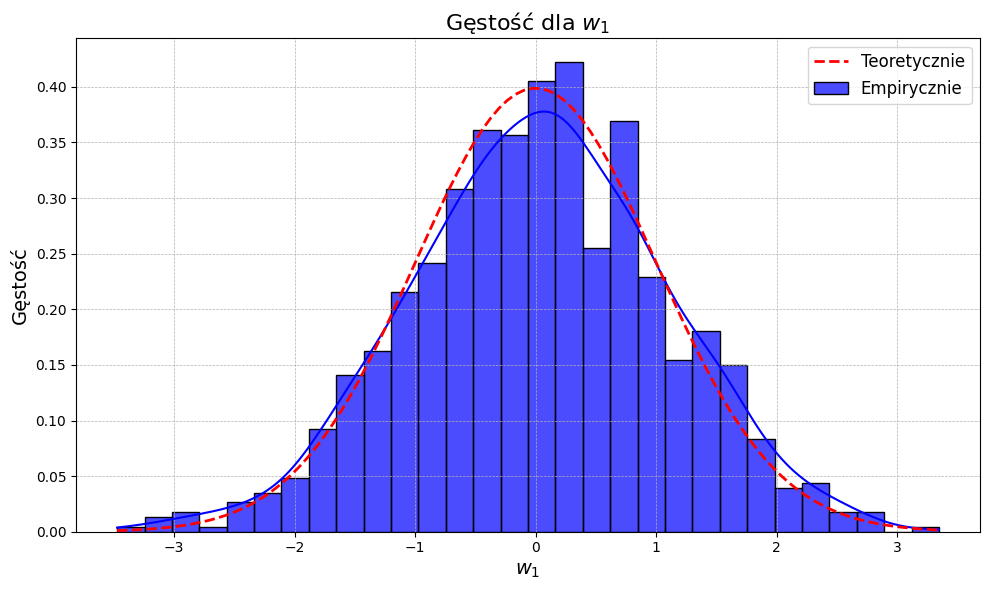

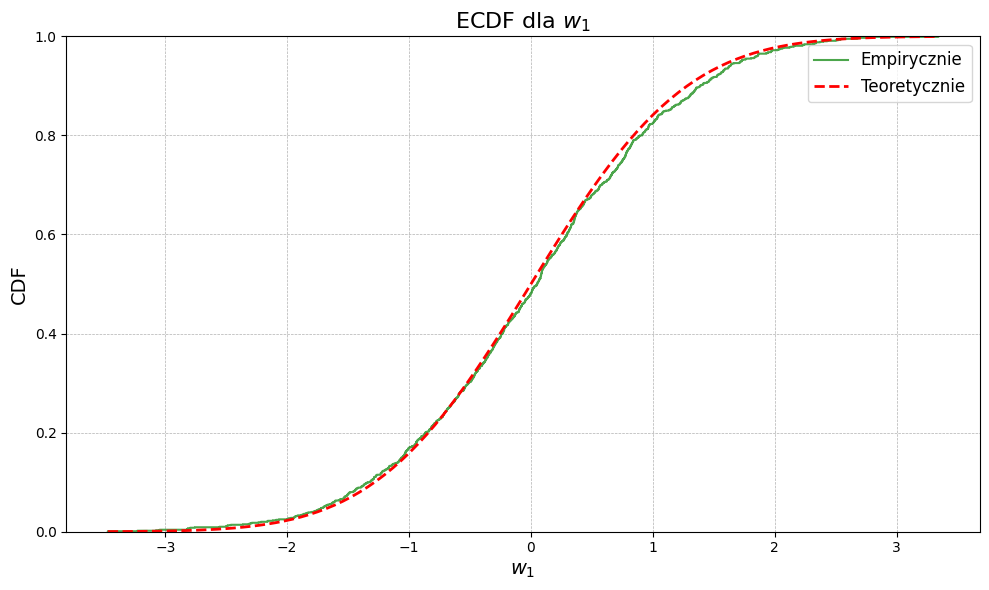

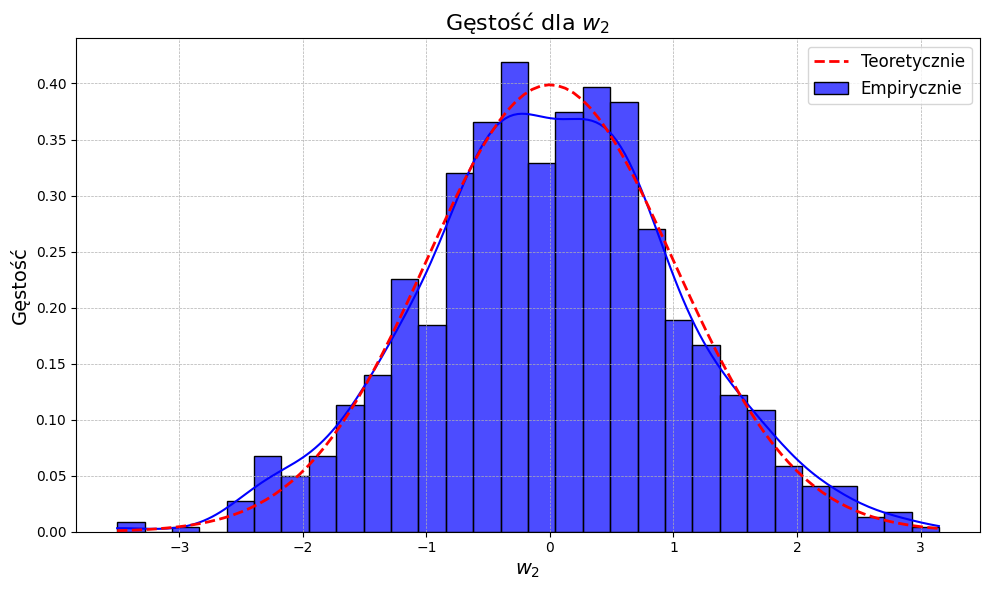

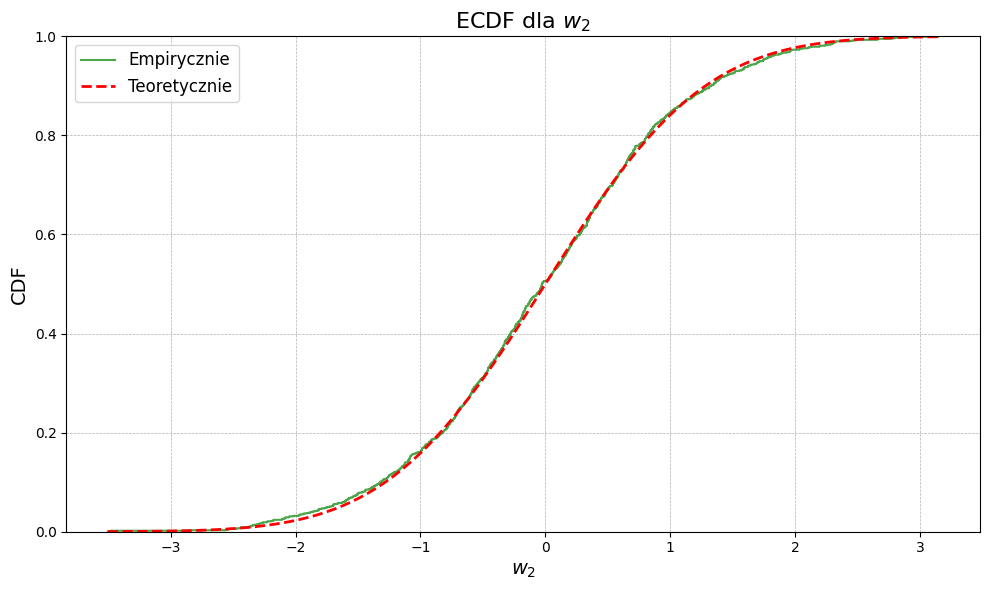

In [26]:
n = 1000
beta_0 = 2
beta_1 = 5
sigma = 2
M = 1000

w1 = np.zeros(M)
w2 = np.zeros(M)

for i in range(M):
    x = np.linspace(0, 10, n)
    epsilon = np.random.normal(0, sigma, n)
    y = beta_0 + beta_1 * x + epsilon

    b0_hat, b1_hat = prosta_regresji_mnk(x, y)
    y_hat = b1_hat * x + b0_hat
    res = y - y_hat
    s = np.sqrt((1 / (n - 2)) * np.sum(res ** 2))
    x_mean = np.mean(x)
    se_b0_hat = s * np.sqrt(1 / n + (x_mean ** 2 / np.sum((x - x_mean) ** 2)))
    se_b1_hat = s / np.sqrt(np.sum((x - x_mean) ** 2))

    w1[i] = (b0_hat - beta_0) / se_b0_hat
    w2[i] = (b1_hat - beta_1) / se_b1_hat

plt.figure(figsize=(10, 6))
sns.histplot(w1, bins=30, color='blue', alpha=0.7, stat='density', label='Empirycznie', kde=True)
x_beta_0 = np.linspace(w1.min(), w1.max(), 100)
plt.plot(x_beta_0, stats.t.pdf(x_beta_0, df=n - 2), 'r--', linewidth=2, label='Teoretycznie')
plt.title(r'Gęstość dla $w_1$', fontsize=16)
plt.xlabel(r'$w_1$', fontsize=14)
plt.ylabel('Gęstość', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.ecdfplot(w1, color='green', alpha=0.7, label='Empirycznie')
x_beta_0 = np.linspace(w1.min(), w1.max(), 100)
plt.plot(x_beta_0, stats.t.cdf(x_beta_0, df=n - 2), 'r--', linewidth=2, label='Teoretycznie')
plt.title(r'ECDF dla $w_1$', fontsize=16)
plt.xlabel(r'$w_1$', fontsize=14)
plt.ylabel('CDF', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(w2, bins=30, color='blue', alpha=0.7, stat='density', label='Empirycznie', kde=True)
x_beta_1 = np.linspace(w2.min(), w2.max(), 100)
plt.plot(x_beta_1, stats.t.pdf(x_beta_1, df=n - 2), 'r--', linewidth=2, label='Teoretycznie')
plt.title(r'Gęstość dla $w_2$', fontsize=16)
plt.xlabel(r'$w_2$', fontsize=14)
plt.ylabel('Gęstość', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.ecdfplot(w2, color='green', alpha=0.7, label='Empirycznie')
x_beta_1 = np.linspace(w2.min(), w2.max(), 100)
plt.plot(x_beta_1, stats.t.cdf(x_beta_1, df=n - 2), 'r--', linewidth=2, label='Teoretycznie')
plt.title(r'ECDF dla $w_2$', fontsize=16)
plt.xlabel(r'$w_2$', fontsize=14)
plt.ylabel('CDF', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

___
# Zadanie 5

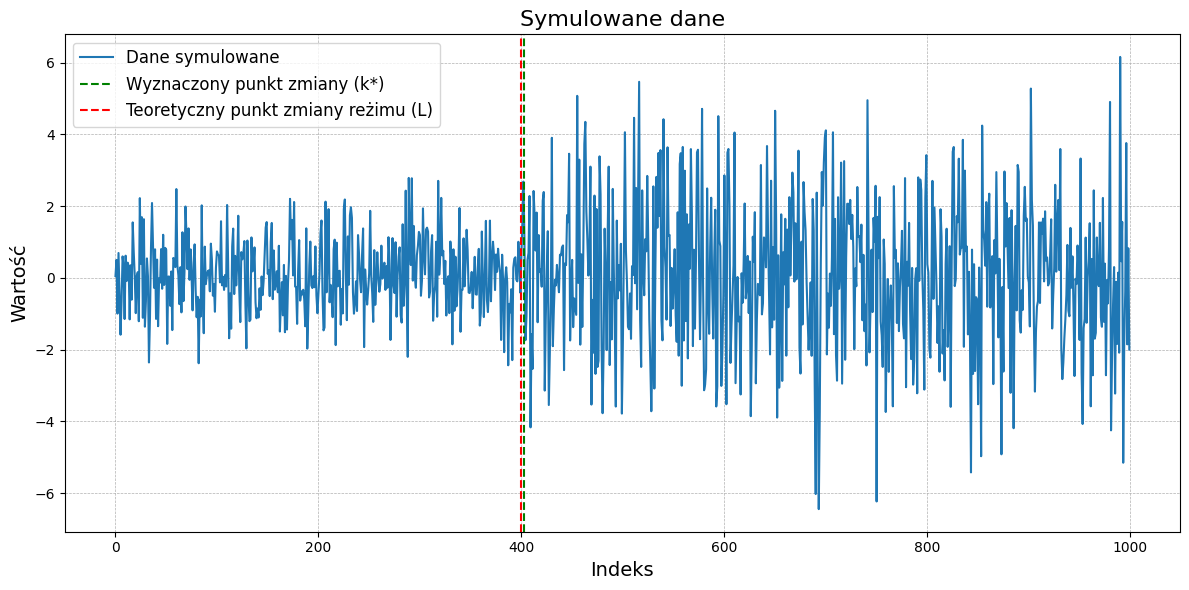

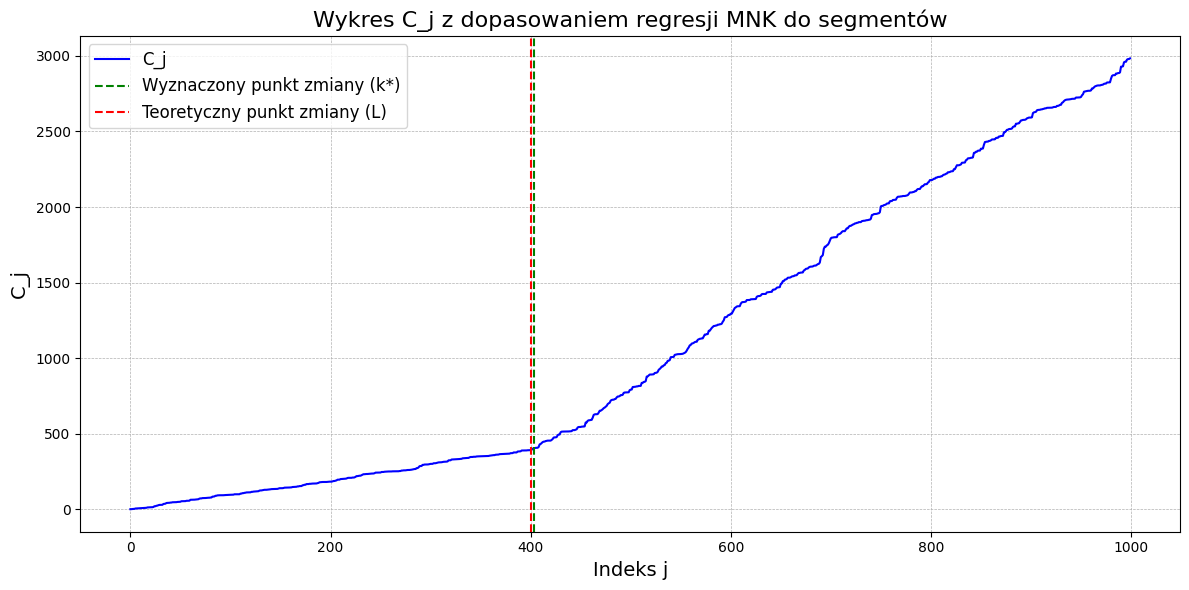

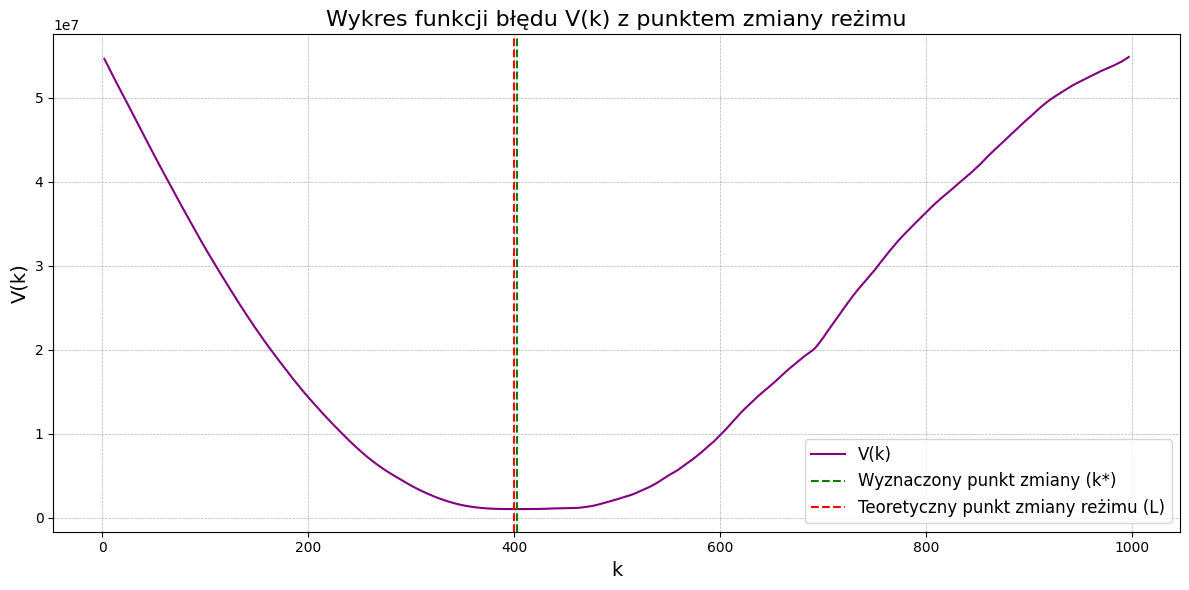

In [29]:
N = 1000
L = 400
sigma_1 = 1
sigma_2 = np.sqrt(5)

np.random.seed(4)
X = np.random.normal(0, sigma_1, L)  
Y = np.random.normal(0, sigma_2, N - L)  
data = np.concatenate([X, Y])

C_j = np.cumsum(data ** 2)

def k_point(C_j):
    k_vals = np.arange(2, N - 2)
    errors = []
    for k in k_vals:
        segment1 = C_j[:k]
        segment2 = C_j[k:]

        x1 = np.arange(len(segment1))
        y1 = segment1
        b0_1, b1_1 = prosta_regresji_mnk(x1, y1)
        fitted_segment1 = b0_1 + b1_1 * x1

        x2 = np.arange(len(segment2))
        y2 = segment2
        b0_2, b1_2 = prosta_regresji_mnk(x2, y2)
        fitted_segment2 = b0_2 + b1_2 * x2

        sum_1 = np.sum((segment1 - fitted_segment1) ** 2)
        sum_2 = np.sum((segment2 - fitted_segment2) ** 2)

        v_k = sum_1 + sum_2
        errors.append(v_k)

    estimated_k = k_vals[np.argmin(errors)]
    return k_vals, errors, estimated_k

k_vals, errors, estimated_k = k_point(C_j)

plt.figure(figsize=(12, 6))
plt.plot(data, label='Dane symulowane')
plt.axvline(estimated_k, color='green', linestyle='--', label='Wyznaczony punkt zmiany (k*)')
plt.axvline(L, color='red', linestyle='--', label='Teoretyczny punkt zmiany reżimu (L)')
plt.xlabel('Indeks', fontsize=14)
plt.ylabel('Wartość', fontsize=14)
plt.legend(fontsize=12)
plt.title('Symulowane dane', fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(C_j, label='C_j', color='blue')
plt.axvline(estimated_k, color='green', linestyle='--', label='Wyznaczony punkt zmiany (k*)')
plt.axvline(L, color='red', linestyle='--', label='Teoretyczny punkt zmiany (L)')
plt.xlabel('Indeks j', fontsize=14)
plt.ylabel('C_j', fontsize=14)
plt.legend(fontsize=12)
plt.title('Wykres C_j z dopasowaniem regresji MNK do segmentów', fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(k_vals, errors, label='V(k)', color='purple')
plt.axvline(estimated_k, color='green', linestyle='--', label='Wyznaczony punkt zmiany (k*)')
plt.axvline(L, color='red', linestyle='--', label='Teoretyczny punkt zmiany reżimu (L)')
plt.xlabel('k', fontsize=14)
plt.ylabel('V(k)', fontsize=14)
plt.legend(fontsize=12)
plt.title('Wykres funkcji błędu V(k) z punktem zmiany reżimu', fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [35]:
N = 1000
L = 400
sigma_1 = 1
sigma_2 = np.sqrt(1.5)
M = 20

k_points = np.zeros(M)

for i in range(M):
    X = np.random.normal(0, sigma_1, L)  
    Y = np.random.normal(0, sigma_2, N - L)  
    data = np.concatenate([X, Y])
    C_j = np.cumsum(data ** 2)
    k = k_point(C_j)[2]
    k_points[i] = k

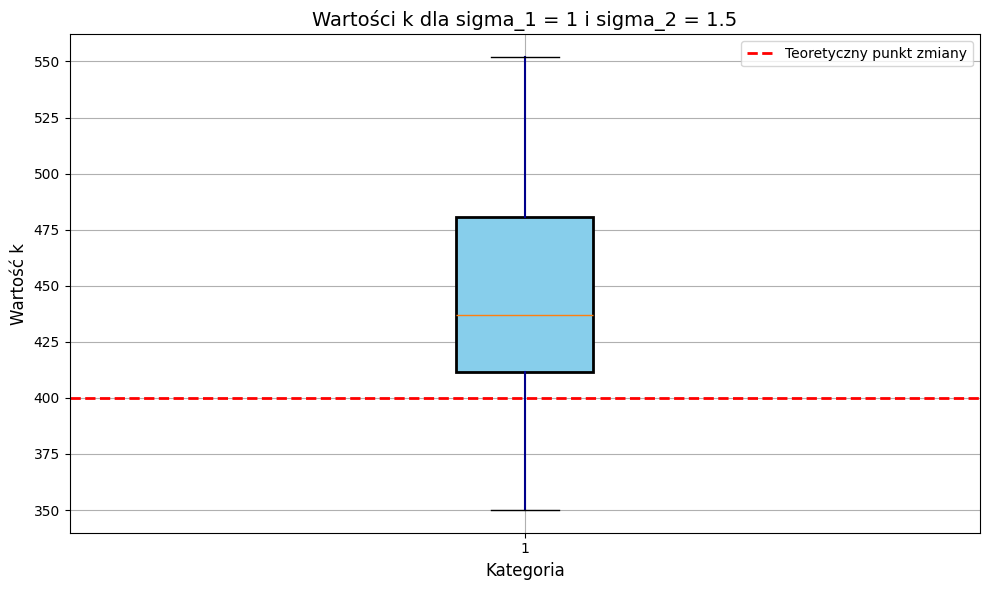

In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot(k_points, patch_artist=True, boxprops=dict(facecolor='skyblue', linewidth=2),
            whiskerprops=dict(color='darkblue', linewidth=1.5), flierprops=dict(markerfacecolor='red', marker='o', markersize=6))
plt.axhline(L, linestyle='--', color='red', linewidth=2, label='Teoretyczny punkt zmiany')
plt.title('Wartości k dla sigma_1 = 1 i sigma_2 = 1.5', fontsize=14)
plt.xlabel('Kategoria', fontsize=12)
plt.ylabel('Wartość k', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [54]:
M = 20
sigmas = [np.sqrt(1.5),np.sqrt(2.5),np.sqrt(5)]
sigma_1 = 1
L = 400
k_values = []

for sigma in sigmas:
    k_points = np.zeros(M)
    for i in range(M):
        X = np.random.normal(0, sigma_1, L)  
        Y = np.random.normal(0, sigma_2, N - L)  
        data = np.concatenate([X, Y])
        C_j = np.cumsum(data ** 2)
        k = k_point(C_j)[2]
        k_points[i] = k
    k_values.append(k_points)

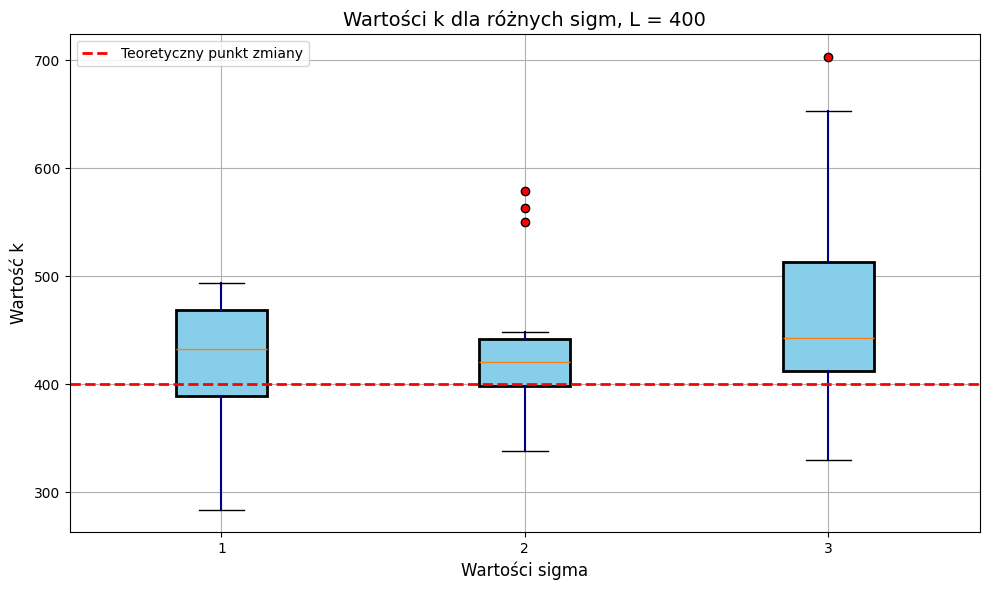

In [56]:
plt.figure(figsize=(10, 6))
plt.boxplot(k_values, patch_artist=True, boxprops=dict(facecolor='skyblue', linewidth=2),
            whiskerprops=dict(color='darkblue', linewidth=1.5), flierprops=dict(markerfacecolor='red', marker='o', markersize=6))
plt.axhline(L, linestyle='--', color='red', linewidth=2, label='Teoretyczny punkt zmiany')
plt.title('Wartości k dla różnych sigm, L = 400', fontsize=14)
plt.xlabel('Wartości sigma', fontsize=12)
plt.ylabel('Wartość k', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [57]:
M = 20
sigmas = [np.sqrt(1.5),np.sqrt(2.5),np.sqrt(5)]
sigma_1 = 1
L = 50
k_values = []

for sigma in sigmas:
    k_points = np.zeros(M)
    for i in range(M):
        X = np.random.normal(0, sigma_1, L)  
        Y = np.random.normal(0, sigma_2, N - L)  
        data = np.concatenate([X, Y])
        C_j = np.cumsum(data ** 2)
        k = k_point(C_j)[2]
        k_points[i] = k
    k_values.append(k_points)

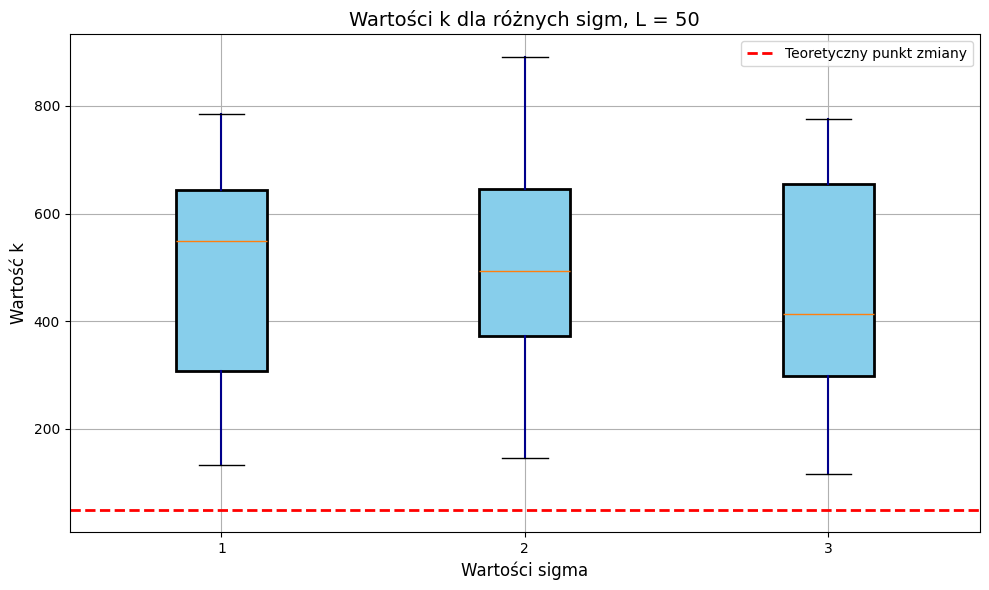

In [58]:
plt.figure(figsize=(10, 6))
plt.boxplot(k_values, patch_artist=True, boxprops=dict(facecolor='skyblue', linewidth=2),
            whiskerprops=dict(color='darkblue', linewidth=1.5), flierprops=dict(markerfacecolor='red', marker='o', markersize=6))
plt.axhline(L, linestyle='--', color='red', linewidth=2, label='Teoretyczny punkt zmiany')
plt.title('Wartości k dla różnych sigm, L = 50', fontsize=14)
plt.xlabel('Wartości sigma', fontsize=12)
plt.ylabel('Wartość k', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()